# Load Libraries

In [1]:
import warnings
import string

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
warnings.filterwarnings("ignore")
sns.set_theme()
%matplotlib inline

# Load dataset

In [3]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

# Check and remove null-values and duplicates

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [7]:
df = df.drop_duplicates()
df.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   24698  24698  Basically there's a family where a little boy ...   
positive   24884  24884  One of the other reviewers has mentioned that ...   

                
          freq  
sentiment       
negative     1  
positive     1

# Check target value distribution

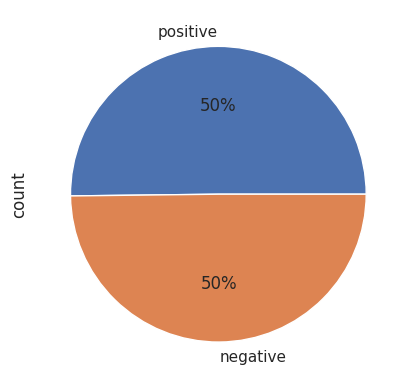

In [8]:
df["sentiment"].value_counts().plot(kind="pie", autopct="%1.0f%%");

In [9]:
df["sentiment"] = df["sentiment"].map({"negative": 0, "positive": 1})
df["sentiment"].value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

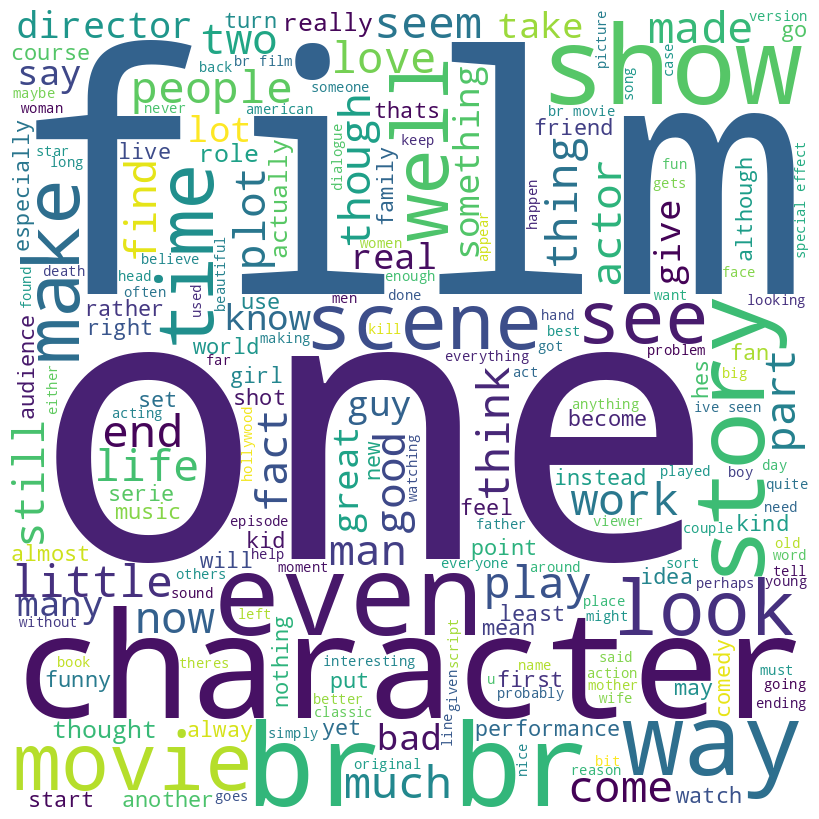

In [10]:
stopwords = set(STOPWORDS)
translator = str.maketrans("", "", string.punctuation)
reviews = df["review"].tolist()

text_data = []

for review in reviews:
    words = review.lower().split()
    words = [word.translate(translator) for word in words]
    words = [word for word in words if word and word not in stopwords]
    text_data.extend(words)

wordcloud = WordCloud(
    width=800, 
    height=800,
    background_color="white",
    stopwords=stopwords,
    min_font_size=10
).generate(" ".join(text_data))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

# Modeling

## LogisticRegression

In [11]:
cnt_vect = CountVectorizer(ngram_range=(1, 2), stop_words="english", min_df=20)

X = cnt_vect.fit_transform(df["review"])
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [12]:
cnt_vect.get_feature_names_out()[1000:1020]

array(['adult film', 'adulterous', 'adultery', 'adulthood', 'adults',
       'adults br', 'adults children', 'adults like', 'advance',
       'advanced', 'advancement', 'advances', 'advancing', 'advantage',
       'advantages', 'advent', 'adventure', 'adventure br',
       'adventure film', 'adventure movie'], dtype=object)

In [13]:
log_reg = LogisticRegression(max_iter=1500, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1500, random_state=42)

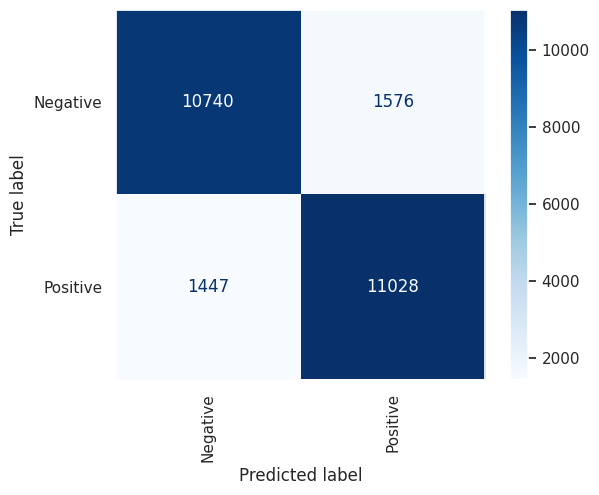

In [14]:
ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    display_labels=["Negative", "Positive"],
    cmap="Blues",
    xticks_rotation="vertical"
)

plt.grid(False);

In [15]:
log_reg.score(X_test, y_test)

0.8780605865031664

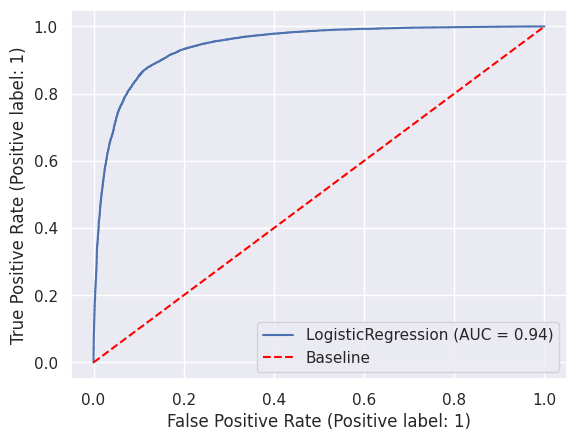

In [16]:
RocCurveDisplay.from_estimator(
    log_reg,
    X_test,
    y_test
)

plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Baseline")

plt.legend()
plt.show();

In [17]:
rnd_clf = RandomForestClassifier(
    n_estimators=250,
    max_features="log2",
    random_state=42, 
)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=250, random_state=42)

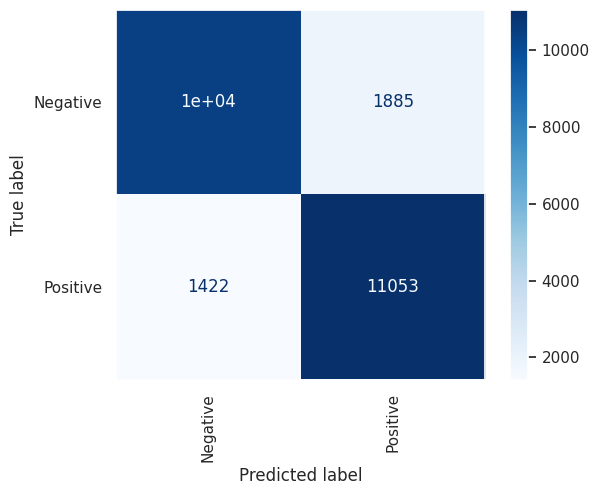

In [18]:
ConfusionMatrixDisplay.from_estimator(
    rnd_clf,
    X_test,
    y_test,
    display_labels=["Negative", "Positive"],
    cmap="Blues",
    xticks_rotation="vertical"
)

plt.grid(False);

In [19]:
rnd_clf.score(X_test, y_test)

0.8666048162639668

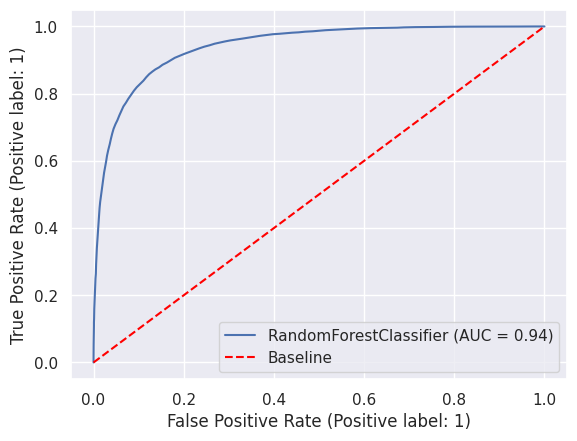

In [20]:
RocCurveDisplay.from_estimator(
    rnd_clf,
    X_test,
    y_test
)

plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Baseline")

plt.legend()
plt.show();

In [21]:
sgd_clf = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=500, random_state=42)

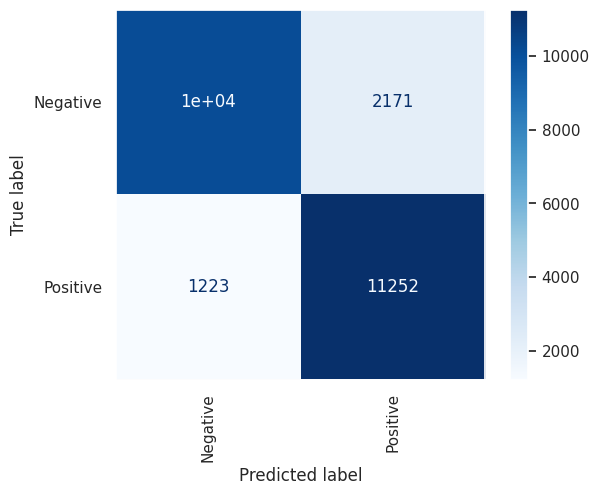

In [22]:
ConfusionMatrixDisplay.from_estimator(
    sgd_clf,
    X_test,
    y_test,
    display_labels=["Negative", "Positive"],
    cmap="Blues",
    xticks_rotation="vertical"
)

plt.grid(False);

In [23]:
sgd_clf.score(X_test, y_test)

0.863095478197733

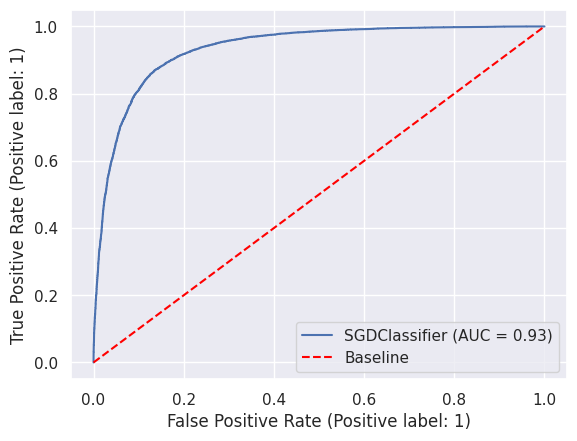

In [24]:
RocCurveDisplay.from_estimator(
    sgd_clf,
    X_test,
    y_test
)

plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Baseline")

plt.legend()
plt.show();

💡 Logical regression still works faster and more accurately on basic settings.

## MultinomialNB

In [25]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

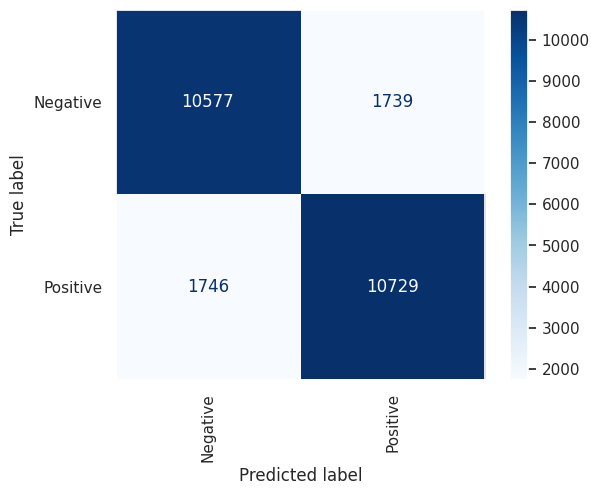

In [26]:
ConfusionMatrixDisplay.from_estimator(
    mnb,
    X_test,
    y_test,
    display_labels=["Negative", "Positive"],
    cmap="Blues",
    xticks_rotation="vertical"
)

plt.grid(False);

In [27]:
mnb.score(X_test, y_test)

0.8594247912548909

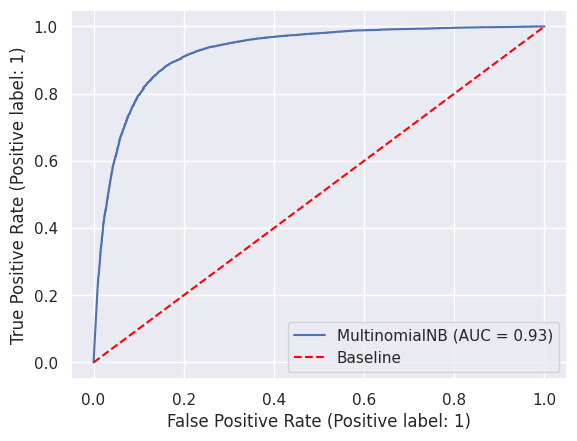

In [28]:
RocCurveDisplay.from_estimator(
    mnb,
    X_test,
    y_test
)

plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Baseline")

plt.legend()
plt.show();

## Tuning

In [29]:
log_reg = LogisticRegression()
params = {
    "max_iter": [1000, 1500, 2000],
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "class_weight": ["balanced"],
    }
search = GridSearchCV(log_reg, params)
search.fit(X_train, y_train)
search.best_score_

0.8880639070145259

In [30]:
search.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2'}

In [31]:
print(classification_report(y_test, search.predict(X_test), target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88     12316
    Positive       0.88      0.89      0.89     12475

    accuracy                           0.88     24791
   macro avg       0.88      0.88      0.88     24791
weighted avg       0.88      0.88      0.88     24791

